In [1]:
# !pip install --upgrade scikit-learn==1.2.2

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_score,recall_score
from sklearn.metrics import roc_curve, classification_report,confusion_matrix, f1_score,roc_auc_score
import warnings

warnings.filterwarnings("ignore")
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

%matplotlib inline

In [3]:
path = r"E:/My_Model/ML_Projects/1_Identifying_Age_Related_Conditions/data"

In [4]:
data = pd.read_csv(f"{path}/Clean_data.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
data.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.061475,0.232916,0.00000,0.078158,0.0,0.000000,0.000000,0.278142,0.160705,0.227421,...,0.171862,0.354549,0.011004,0.119559,0.000000,0.018045,0.191389,0.362261,0.005425,1
1,0.030738,0.062786,0.00000,0.137435,0.0,0.197200,0.000000,0.438798,0.000000,0.355513,...,0.000000,0.000000,0.203576,0.085751,0.000000,0.253512,0.296838,0.164135,1.000000,0
2,0.186475,0.195066,0.00000,0.118693,0.0,0.405719,0.000000,0.408743,0.000000,0.321755,...,0.181785,0.136652,0.459422,0.544777,0.024356,0.123852,0.280076,0.180218,0.008910,0
3,0.081967,0.289668,0.11219,0.300705,0.0,0.200775,0.000000,0.331967,0.000000,0.231448,...,0.143495,0.000000,0.088033,0.238350,0.014928,0.018865,0.459749,0.470820,0.007039,0
4,0.143443,0.282751,0.00000,0.044439,0.0,0.218052,0.118812,0.000000,1.000000,0.377181,...,0.192483,1.000000,0.022008,0.203312,0.111896,0.077148,0.541597,0.185841,0.004345,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      617 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      617 non-null    float64
 16  CC      617 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

## 10. MODEL TRAINING AND EVALUATING

In [7]:
def plot_categorical_cols(data, column):
    df = pd.DataFrame(
        {
            column:data[column].value_counts(),
            "Ratio": round(100*data[column].value_counts()/len(data),2)
        }
    )
    plt.figure(figsize=(5,4))
    sns.countplot(data=data, x=column, palette="Set2")
    plt.title(f"Distribution of {column}")
    return df

In [8]:
X = data.drop("Class", axis=1)
y = data["Class"]

In [9]:
print(f"Shape of \n X {X.shape}")
print(f"Shape of \n Y {y.shape}")

Shape of 
 X (617, 56)
Shape of 
 Y (617,)


,Class,Ratio
Class,,
0,509,82.5
1,108,17.5


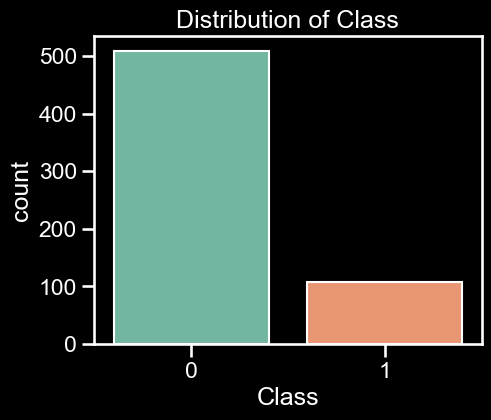

In [10]:
plot_categorical_cols(data, "Class")

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X, y)

Y_sm.value_counts()

Class
1    509
0    509
Name: count, dtype: int64

<AxesSubplot: xlabel='Class', ylabel='count'>

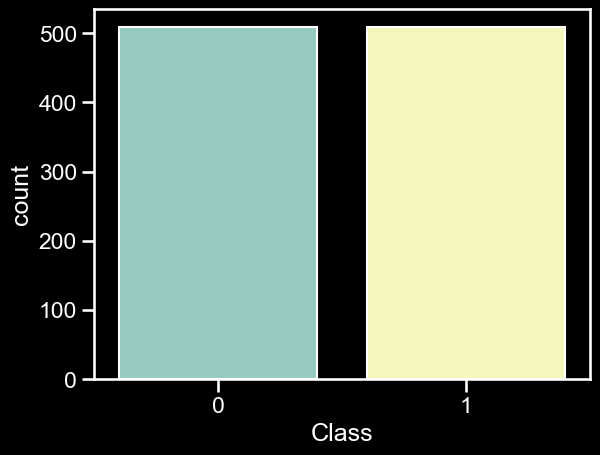

In [12]:
sns.countplot(data=data, x=Y_sm)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 56)
(306, 56)
(712,)
(306,)


In [14]:
# List of classifiers to test
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Adaboost Classifier', AdaBoostClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('KNN Classifier', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB Classifier',GaussianNB()),
    ('XGB Classifier', XGBClassifier())
]

# iterating over classifiers
for clf, clf_algo in classifiers:
    
    # applying k-fold cross validation score
    scores = cross_val_score(estimator=clf_algo, X=X_train, y = y_train, cv=5, scoring='accuracy')
    
    # calculating average performance of the metrics
    avg_score = scores.mean()
    
    # calculating average precision of classifiers
    avg_precision = cross_val_score(estimator=clf_algo, X=X_train, y = y_train, cv=5, scoring='precision_macro').mean()
    
    # calculating average recall of classifiers
    avg_recall = cross_val_score(estimator=clf_algo, X=X_train, y = y_train, cv=5, scoring='recall_macro').mean()
     
    # Print the performance metrics
    print(f'Classifier: {clf}')
    print(f'Average Accuracy: {avg_score:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Logistic Regression
Average Accuracy: 0.8961
Average Precision: 0.8984
Average Recall: 0.8959
-----------------------
Classifier: Decision Tree Classifier
Average Accuracy: 0.8891
Average Precision: 0.8797
Average Recall: 0.8821
-----------------------
Classifier: Adaboost Classifier
Average Accuracy: 0.9185
Average Precision: 0.9204
Average Recall: 0.9184
-----------------------
Classifier: Random Forest Classifier
Average Accuracy: 0.9536
Average Precision: 0.9584
Average Recall: 0.9536
-----------------------
Classifier: KNN Classifier
Average Accuracy: 0.9129
Average Precision: 0.9218
Average Recall: 0.9129
-----------------------
Classifier: Gaussion NB Classifier
Average Accuracy: 0.8146
Average Precision: 0.8211
Average Recall: 0.8145
-----------------------
Classifier: XGB Classifier
Average Accuracy: 0.9466
Average Precision: 0.9490
Average Recall: 0.9466
-----------------------


In [15]:
# BASE MODEL:

def accuracy_df(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Adaboost Classifier', AdaBoostClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('KNN Classifier', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB Classifier',GaussianNB()),
    ('XGB Classifier', XGBClassifier())
    ]
    

    results = pd.DataFrame(columns=["Model","Accuracy Score","F1 Score","ROC AUC Score",
                              "average Cross Val Score","precision_score","recall_score"])
    for model_name, model  in classifiers:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        acc=accuracy_score(y_test,y_pred)
        f1=f1_score(y_test,y_pred)
        roc=roc_auc_score(y_test,y_pred)
        average_cv=cv=cross_val_score(model,X_train,y_train,cv=10).mean()
        ps=precision_score(y_test,y_pred)
        rs=recall_score(y_test,y_pred)
    
        results = results._append({"Model": model_name,
                            "Accuracy Score":acc,
                            "F1 Score":f1,
                            "ROC AUC Score":roc,
                            "average Cross Val Score":average_cv,
                            "precision_score":ps,
                            "recall_score":rs},ignore_index=True)
    

    results=results.sort_values(by="Accuracy Score",ascending=False)
    results=results.style.background_gradient(cmap="Spectral")
    
    return results

all_results = accuracy_df(X_sm, Y_sm)
all_results

,Model,Accuracy Score,F1 Score,ROC AUC Score,average Cross Val Score,precision_score,recall_score
3,Random Forest Classifier,0.973856,0.974194,0.973856,0.957864,0.961783,0.986928
6,XGB Classifier,0.960784,0.961538,0.960784,0.953619,0.943396,0.980392
0,Logistic Regression,0.934641,0.934211,0.934641,0.912872,0.940397,0.928105
2,Adaboost Classifier,0.934641,0.935065,0.934641,0.919875,0.929032,0.941176
4,KNN Classifier,0.924837,0.929664,0.924837,0.910055,0.873563,0.993464
1,Decision Tree Classifier,0.895425,0.899371,0.895425,0.887676,0.866667,0.934641
5,Gaussion NB Classifier,0.820261,0.805654,0.820261,0.809018,0.876923,0.745098


## 13. MODEL TUNING

In [16]:
# hypermetre tuning:

rf_params={'max_depth': [2, 5, 8, 10],
              'max_features': [2, 5, 8],
                'n_estimators': [10, 500, 1000]}

xgb_params={'learning_rate': [0.1, 0.01, 0.001],
                'max_depth': [3, 5, 8, 10],
                'n_estimators': [10, 500, 1000]}

ada_params = {"n_estimators": [10, 100, 500, 1000],
                "learning_rate": [0.01, 0.1, 1.0, 10.0]}

# list of tuple containing models and their names:

models=[('RF', RandomForestClassifier(), rf_params),
        ('XGB', XGBClassifier(), xgb_params),
        ('ADA', AdaBoostClassifier(), ada_params)]

def model_tuning(X , y, cv=10, scoring="accuracy"):
    print("Model tuning is starting...")
    print("Model count: ", len(models))
    print("CV: ", cv)
    print("Scoring: ", scoring)
    print("Model list: ", [i[0] for i in models])
    print("--------------------------------------------------")
    
    best_models={}
    
    for name, model, params in models:
        print(f"Model: {name} is tuning...")
        cv_results=cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(),4)}")
        
        gs_best=GridSearchCV(model, params, cv=cv, n_jobs=-1, verbose=False).fit(X,y)
        final_model=model.set_params(**gs_best.best_params_)
        
        cv_results=cross_validate(final_model, X, y, cv=cv, scoring=scoring, return_train_score=True)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(),4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name]=final_model
    return best_models

best_models=model_tuning(X_sm,Y_sm)

Model tuning is starting...
Model count:  3
CV:  10
Scoring:  accuracy
Model list:  ['RF', 'XGB', 'ADA']
--------------------------------------------------
Model: RF is tuning...
accuracy (Before): 0.9676
accuracy (After): 0.9666
RF best params: {'max_depth': 10, 'max_features': 2, 'n_estimators': 1000}

Model: XGB is tuning...
accuracy (Before): 0.9666
accuracy (After): 0.9695
XGB best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

Model: ADA is tuning...
accuracy (Before): 0.9352
accuracy (After): 0.9548
ADA best params: {'learning_rate': 1.0, 'n_estimators': 1000}



## final model RANDOM FOREST

In [20]:
Rm_model = RandomForestClassifier(max_depth = 10, max_features = 2, n_estimators = 1000).fit(X_train, y_train)
predict_y = Rm_model.predict(X_train)
Rm_model.score(X_train, y_train)

1.0

In [24]:
accuracy_score(predict_y, y_train)

1.0

In [21]:
predict_test_y = Rm_model.predict(X_test)
Rm_model.score(X_test, y_test)

0.9803921568627451

In [25]:
accuracy_score(predict_test_y, y_test)

0.9803921568627451

In [26]:
# Method to evaluate the performance of the model
def evaluate_model(y_act,y_pred):
    print("Classification Report\n")
    print(classification_report(y_act,y_pred))
    
    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_act,y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True,fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       153
           1       0.98      0.98      0.98       153

    accuracy                           0.98       306
   macro avg       0.98      0.98      0.98       306
weighted avg       0.98      0.98      0.98       306


---------------------------------------------



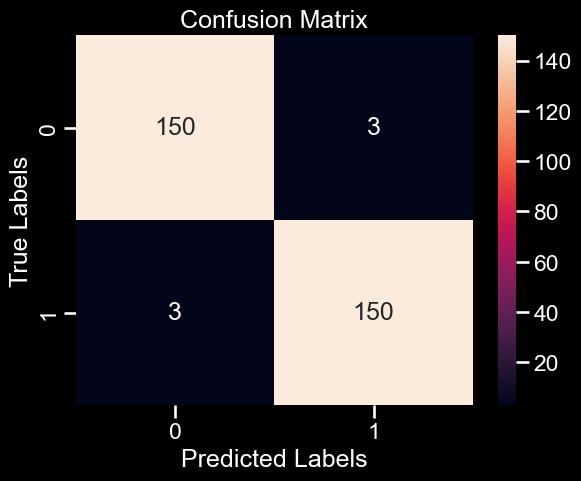

In [27]:
# Evaluating the model
evaluate_model(y_test, predict_test_y)

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00       356

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712


---------------------------------------------



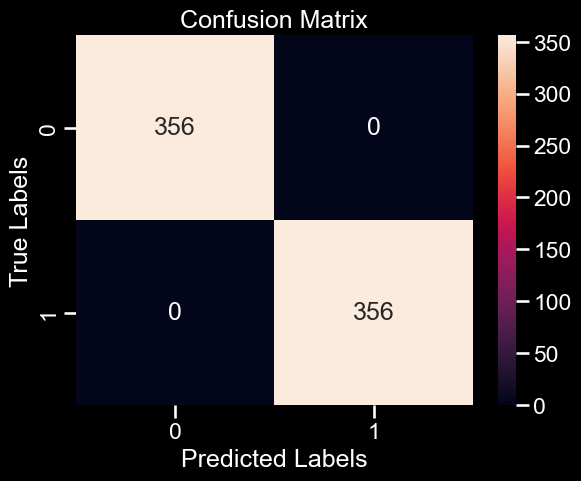

In [28]:
# Evaluating the model
evaluate_model(y_train, predict_y)

## 11. FEATURE IMPORTANCE

<AxesSubplot: >

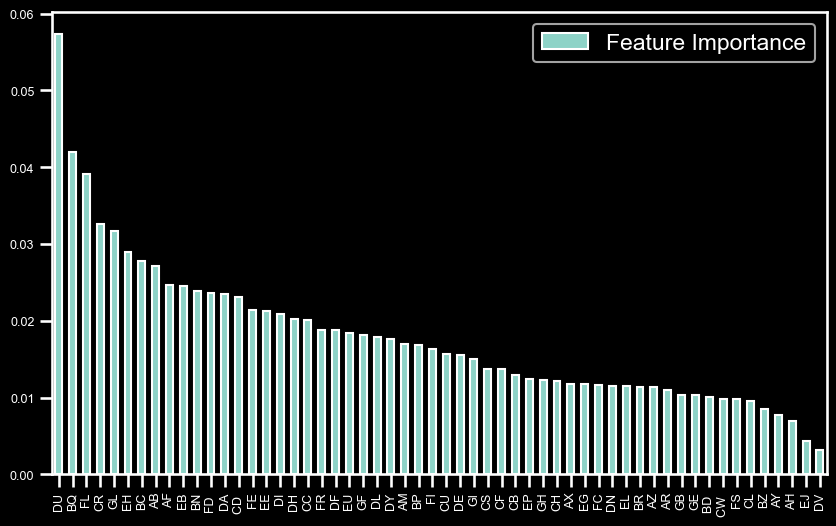

In [29]:
feature_imp = Rm_model.feature_importances_
feature_df = pd.DataFrame(data=feature_imp, index=data.columns[:-1], columns=["Feature Importance"])

feature_df.sort_values(by='Feature Importance',ascending=False).plot(kind="bar",figsize=(10,6), fontsize=(9))

## 12 AUC-ROC

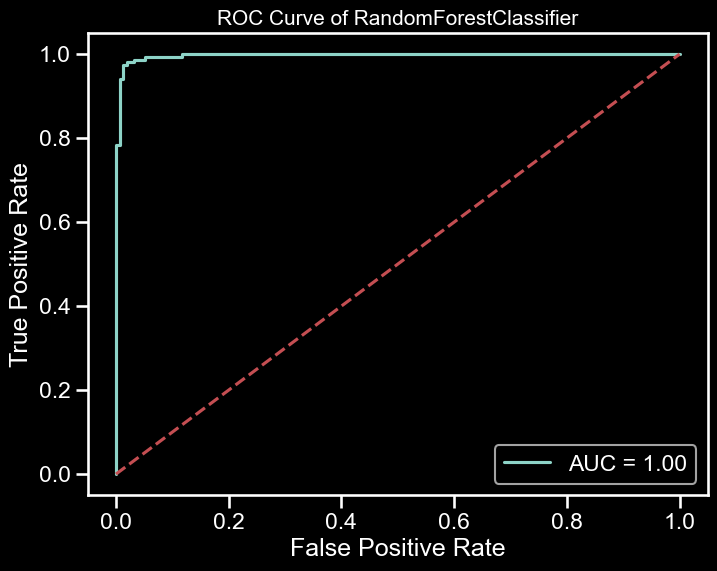

In [30]:
# AUC_ROC Curve:
def AUC_ROC(model, y_act, x_act, figure_size=((8, 6))):
    y_prob = Rm_model.predict_proba(x_act)[:,1]
    fpr, tpr, thresholds = roc_curve(y_act, y_prob)
    plt.figure(figsize = figure_size)
    plt.plot(fpr, tpr, label = "AUC = %0.2f" % roc_auc_score(y_act, y_prob))
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc = 'lower right')
    plt.title("ROC Curve of "+Rm_model.__class__.__name__, size = 15)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

AUC_ROC(Rm_model, x_act = X_test, y_act = y_test)

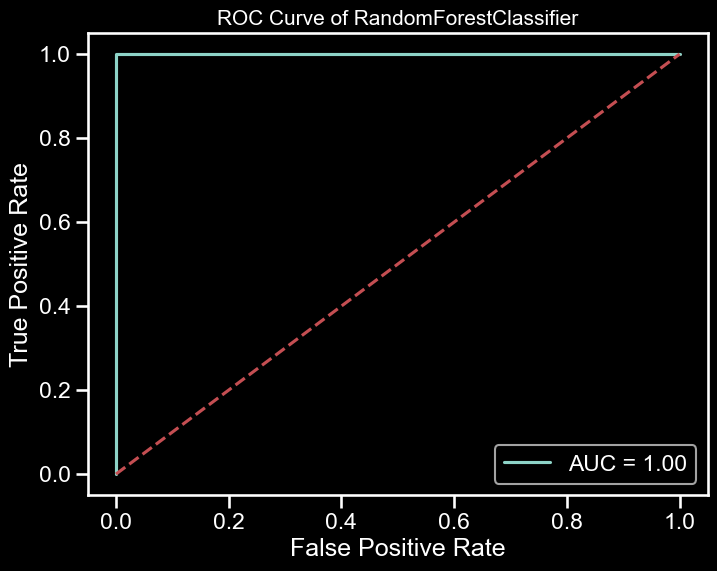

In [31]:
AUC_ROC(Rm_model, x_act=X_train, y_act=y_train)

## Data preparation for test 

In [32]:
# testing on the test set

path = r"E:/My_Model/ML_Projects/1_Identifying_Age_Related_Conditions/data"

df = pd.read_csv(f"{path}/test.csv")
data = df.copy()

# prepare the data
def prepare_data(data):
    
    # data = data.drop(["Id"],axis=1)
    # separate the categorical and numeric columns
    cat_cols = [col  for col in data.columns if data[col].dtype == "O"]
    num_cols = [col for col in data.columns if data[col].dtype != "O"]

    # detect the outliers
    a1 = 0.05
    a3 = 0.95
    for col in num_cols:
        q1=data[col].quantile(a1)
        q3=data[col].quantile(a3)
        
        IQR=q3-q1
        
        up_limit = q3 + 1.5 * IQR
        low_limit = q1 - 1.5 * IQR

        # capping the outliers
        data[col] = np.where(data[col] > up_limit, up_limit, data[col])
        data[col] = np.where(data[col] < low_limit, low_limit, data[col])

    # return data
    
    for col in data.columns:
        if data[col].dtype == 'object' and col !="Id":
            if data[col].nunique() <= 2:
                le = LabelEncoder()
                data[col] = le.fit_transform(data[col])
            elif data[col].nunique() > 2  and data[col].nunique() <= 10:
                ohe = OneHotEncoder()
                ohe_df = pd.DataFrame(ohe.fit_transform(data[[col]]).toarray())
                ohe_df.columns = [col + "_" + str(i) for i in ohe_df.columns]
                data = data.join(ohe_df)
                data = data.drop(col, axis=1)
    
        
    Mm_sclr = MinMaxScaler()
    for col in data.columns:
        if col !="Id":
            data[col]=Mm_sclr.fit_transform(data[[col]])
            
    return data

In [33]:
preprocesed_data = prepare_data(df)

In [34]:
# Submissions:

features = [i for i in preprocesed_data.columns if i not in ["Id"]]

y_pred=Rm_model.predict_proba(preprocesed_data[features])

submission = pd.DataFrame(preprocesed_data["Id"],columns=["Id"])
submission["class_0"]=y_pred[:,0]
submission["class_1"]=y_pred[:,1]
submission.to_csv("submission.csv",index=False)

submission.head()

,Id,class_0,class_1
0,00eed32682bb,0.669596,0.330404
1,010ebe33f668,0.669596,0.330404
2,02fa521e1838,0.669596,0.330404
3,040e15f562a2,0.669596,0.330404
4,046e85c7cc7f,0.669596,0.330404


## 14. CONCLUSION

I have chosen RandomForestClassifier for submision. I have tried other models like LogisticRegression, KNeighborsClassifier, SVC, GaussianNB, DecisionTreeClassifier, AdaBoostClassifier, XGBClassifier. But the best result was achieved with RandomForestClassifier